# Data

In [6]:
import os

path_data = {}

path_data["train"] = [os.path.join(root, file) for root, dirs, files in os.walk(
    "DataSet/trainset") for file in files] + [os.path.join(root, file) for root, dirs, files in os.walk
    ("DataSet/validationset") for file in files] 
path_data["test"] = [os.path.join(root, file) for root, dirs, files in os.walk(
    "DataSet/testset") for file in files]

In [7]:
import pandas as pd
import numpy as np

data = {}  # dict to store X data for all phases

for phase in ["train", "test"]:
    # dframe to store X data of current phase
    X_df = pd.DataFrame()
    # array to store y data of current phase
    y_array = []

    # appends all user dframes to X dframe
    for user_idx, f_path in enumerate(path_data[phase]):
        data_df = pd.read_csv(f_path).iloc[:, 2:]  # gets X data for current user csv (excluding first 2 columns)
        data_df["user_id"] = str(user_idx)  # sets unique user id
        data_df["specifictime"] = pd.to_datetime(data_df["specifictime"])  # converts from string to datetime64 format
        X_df = pd.concat([X_df, data_df])  # adds to phase dframe

        # gets y variable from file path
        if "UGE" in f_path:
            y_array.append("UGE")
        elif "UBE" in f_path:
            y_array.append("UBE")

    X_df.iloc[:, 1:-1] = X_df.iloc[:, 1:-1].astype(np.float64)
    X_df = X_df.set_index(["user_id", "specifictime"])  # sets multi index
    data[phase] = [X_df, np.array(y_array)]  # adds to phase dict

In [154]:
from sktime.datatypes import convert_to

X_train_nested = convert_to(data["train"][0], to_type="nested_univ")
y_train = data["train"][1]
X_test_nested = convert_to(data["test"][0], to_type="nested_univ")
y_test = data["test"][1]

In [155]:
X_train.head()

,indicator1,indicator2,indicator3,indicator4,indicator5,indicator6,indicator7,indicator8
user_id,,,,,,,,
0,2021-06-10 18:09:59 45.00 2021-06-10 18:09:...,2021-06-10 18:09:59 36.00 2021-06-10 18:09:...,2021-06-10 18:09:59 3.00 2021-06-10 18:09...,2021-06-10 18:09:59 45.00 2021-06-10 18:09:...,2021-06-10 18:09:59 229.0 2021-06-10 18:09:...,2021-06-10 18:09:59 45.0 2021-06-10 18:09:5...,2021-06-10 18:09:59 0.2000 2021-06-10 18:09...,2021-06-10 18:09:59 0.0000 2021-06-10 18:09...
1,2021-06-10 18:09:59 0.00 2021-06-10 18:14:...,2021-06-10 18:09:59 0.00 2021-06-10 18:14:...,2021-06-10 18:09:59 0.0 2021-06-10 18:14:59...,2021-06-10 18:09:59 0.0 2021-06-10 18:14:5...,2021-06-10 18:09:59 1.0 2021-06-10 18:14:5...,2021-06-10 18:09:59 25.0 2021-06-10 18:14:5...,2021-06-10 18:09:59 0.0 2021-06-10 18:14:59...,2021-06-10 18:09:59 0.0 2021-06-10 18:14:59...
2,2021-06-10 18:04:59 40.00 2021-06-10 18:04:...,2021-06-10 18:04:59 130.73 2021-06-10 18:04...,2021-06-10 18:04:59 15.91 2021-06-10 18:04:...,2021-06-10 18:04:59 35.45 2021-06-10 18:04...,2021-06-10 18:04:59 53.0 2021-06-10 18:04:...,2021-06-10 18:04:59 38.0 2021-06-10 18:04:...,2021-06-10 18:04:59 0.0 2021-06-10 18:04:59...,2021-06-10 18:04:59 0.0 2021-06-10 18:04:59...
3,2021-06-10 18:14:59 23.00 2021-06-10 18:14:...,2021-06-10 18:14:59 10.00 2021-06-10 18:14:...,2021-06-10 18:14:59 1.00 2021-06-10 18:14:...,2021-06-10 18:14:59 23.00 2021-06-10 18:1...,2021-06-10 18:14:59 11.0 2021-06-10 18:14:...,2021-06-10 18:14:59 24.0 2021-06-10 18:14:5...,2021-06-10 18:14:59 0.0000 2021-06-10 18:14...,2021-06-10 18:14:59 0.0000 2021-06-10 18:14...
4,2021-06-10 00:04:59 44.00 2021-06-10 00:0...,2021-06-10 00:04:59 9.50 2021-06-10 00:04:...,2021-06-10 00:04:59 3.50 2021-06-10 00:04:...,2021-06-10 00:04:59 44.00 2021-06-10 00:0...,2021-06-10 00:04:59 8.0 2021-06-10 00:04:5...,2021-06-10 00:04:59 44.0 2021-06-10 00:04:5...,2021-06-10 00:04:59 0.0000 2021-06-10 00:04...,2021-06-10 00:04:59 0.0000 2021-06-10 00:04...


# Sample

In [171]:
x1 = pd.DataFrame(X_train_nested.loc["0"][0])
x2 = pd.DataFrame(X_train_nested.loc["200"][0])

UBE


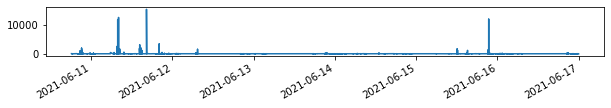

UGE


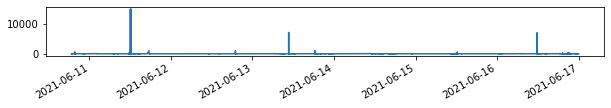

In [172]:
import matplotlib.pyplot as plt

print(y_train[3])
x1["indicator1"].plot()
plt.rcParams["figure.figsize"] = (10,1)
plt.show()

print(y_train[200])
x2["indicator1"].plot()
plt.rcParams["figure.figsize"] = (10,1)
plt.show()

In [173]:
print(x1.describe())
print(x1.skew())
print(x1.kurtosis())

         indicator1
count   9495.000000
mean      24.398252
std      276.982041
min        0.000000
25%        5.000000
50%       13.400000
75%       22.250000
max    15309.000000
indicator1    44.213985
dtype: float64
indicator1    2105.459253
dtype: float64


In [174]:
print(x2.describe())
print(x2.skew())
print(x2.kurtosis())

         indicator1
count   8460.000000
mean      15.873343
std      257.297012
min        0.000000
25%        5.000000
50%        5.400000
75%        6.000000
max    15044.000000
indicator1    52.15286
dtype: float64
indicator1    2887.236207
dtype: float64


In [175]:
# 10 largest fourier series coefficients
a = abs(np.fft.fft(x1["indicator1"].to_numpy()))
result_args = np.sort(np.argpartition(-a, 10)[:10]); result_args

array([   0,    3, 2907, 2910, 3678, 3761, 5734, 5817, 6585, 9492])

In [176]:
# 10 largest fourier series coefficients
b = abs(np.fft.fft(x2["indicator1"].to_numpy()))
result_args = np.sort(np.argpartition(-b, 10)[:10]); result_args

array([   0,  171,  342,  813,  980, 3590, 4870, 7647, 8118, 8289])

In [181]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=5)
outliers_prediction_x1 = lof.fit_predict(np.expand_dims(x1["indicator1"], axis=1))
outliers_prediction_x1 = [1 if i==-1 else 0 for i in outliers_prediction_x1]  # outlier = -1, inlier = 1 --> outlier = 1, inlier = 0
print(sum(outliers_prediction_x1)/x1.count())

indicator1    0.07425
dtype: float64


In [180]:
outliers_prediction_x2 = lof.fit_predict(np.expand_dims(x2["indicator1"], axis=1))
outliers_prediction_x2 = [1 if i==-1 else 0 for i in outliers_prediction_x2]  # outlier = -1, inlier = 1 --> outlier = 1, inlier = 0
print(sum(outliers_prediction_x2)/x2.count())

indicator1    0.030142
dtype: float64


# Feature Creation

In [217]:
X_train = pd.DataFrame()

for user_id, df in X_train_nested.groupby(level=0):
    row_df = pd.DataFrame()
    for column in df.columns:
        temp_df = pd.DataFrame()

        temp_df[f"{column}_mean"] = [df[column][0].mean()]
        temp_df[f"{column}_std"] = [df[column][0].std()]
        temp_df[f"{column}_min"] = [df[column][0].min()]
        temp_df[f"{column}_q25"] = [df[column][0].quantile(0.25)]
        temp_df[f"{column}_q50"] = [df[column][0].quantile(0.50)]
        temp_df[f"{column}_q75"] = [df[column][0].quantile(0.75)]
        temp_df[f"{column}_max"] = [df[column][0].max()]
        temp_df[f"{column}_skew"] = [df[column][0].skew()]
        temp_df[f"{column}_kurtosis"] = [df[column][0].kurtosis()]

        temp = abs(np.fft.fft(df[column][0].to_numpy()))
        for idx, coefficient in enumerate(np.sort(np.argpartition(-temp, 10)[:10])):
            temp_df[f"{column}_fft_coeff_{idx+1}"] = coefficient

        lof = LocalOutlierFactor(n_neighbors=5)
        outliers_prediction = lof.fit_predict(np.expand_dims(df[column][0], axis=1))
        outliers_prediction = [1 if i==-1 else 0 for i in outliers_prediction]
        temp_df[f"{column}_outlier_pct"] = [sum(outliers_prediction)/df[column][0].count()]

        row_df = pd.concat([row_df, temp_df], axis=1)
    X_train = pd.concat([X_train, row_df], axis=0)
X_train = X_train.reset_index().iloc[:, 1:-1]

In [218]:
X_train.head()

,indicator1_mean,indicator1_std,indicator1_min,indicator1_q25,indicator1_q50,indicator1_q75,indicator1_max,indicator1_skew,indicator1_kurtosis,indicator1_fft_coeff_1,...,indicator8_fft_coeff_1,indicator8_fft_coeff_2,indicator8_fft_coeff_3,indicator8_fft_coeff_4,indicator8_fft_coeff_5,indicator8_fft_coeff_6,indicator8_fft_coeff_7,indicator8_fft_coeff_8,indicator8_fft_coeff_9,indicator8_fft_coeff_10
0,24.398252,276.982041,0.0,5.0,13.4,22.25,15309.00,44.213985,2105.459253,0,...,0,1,3,8,3561,5934,7476,9487,9492,9494
1,10.797209,43.162851,0.0,0.0,4.5,11.71,1227.33,16.825223,353.024753,0,...,0,5,437,887,956,1797,1894,2735,3254,3686
2,21.276210,170.927925,0.0,5.0,13.4,24.00,12567.50,49.980702,2907.322761,0,...,0,1,5,6,7,16,18912,18913,18914,18918
3,224.964773,1682.547160,0.0,0.0,0.0,16.00,63147.00,19.057862,600.788037,0,...,0,1,6,7,21,3373,3387,3388,3390,3393
4,19.765360,245.150737,0.0,2.0,9.5,21.00,11491.00,45.426836,2119.350987,0,...,0,1,2,9,32,520,2235,2258,2265,2266


In [236]:
X_test = pd.DataFrame()

for user_id, df in X_test_nested.groupby(level=0):
    row_df = pd.DataFrame()
    for column in df.columns:
        temp_df = pd.DataFrame()

        temp_df[f"{column}_mean"] = [df[column][0].mean()]
        temp_df[f"{column}_std"] = [df[column][0].std()]
        temp_df[f"{column}_min"] = [df[column][0].min()]
        temp_df[f"{column}_q25"] = [df[column][0].quantile(0.25)]
        temp_df[f"{column}_q50"] = [df[column][0].quantile(0.50)]
        temp_df[f"{column}_q75"] = [df[column][0].quantile(0.75)]
        temp_df[f"{column}_max"] = [df[column][0].max()]
        temp_df[f"{column}_skew"] = [df[column][0].skew()]
        temp_df[f"{column}_kurtosis"] = [df[column][0].kurtosis()]

        temp = abs(np.fft.fft(df[column][0].to_numpy()))
        for idx, coefficient in enumerate(np.sort(np.argpartition(-temp, 10)[:10])):
            temp_df[f"{column}_fft_coeff_{idx+1}"] = coefficient

        lof = LocalOutlierFactor(n_neighbors=5)
        outliers_prediction = lof.fit_predict(np.expand_dims(df[column][0], axis=1))
        outliers_prediction = [1 if i==-1 else 0 for i in outliers_prediction]
        temp_df[f"{column}_outlier_pct"] = [sum(outliers_prediction)/df[column][0].count()]

        row_df = pd.concat([row_df, temp_df], axis=1)
    X_test = pd.concat([X_test, row_df], axis=0)
X_test = X_test.reset_index().iloc[:, 1:-1]

In [237]:
X_test

,indicator1_mean,indicator1_std,indicator1_min,indicator1_q25,indicator1_q50,indicator1_q75,indicator1_max,indicator1_skew,indicator1_kurtosis,indicator1_fft_coeff_1,...,indicator8_fft_coeff_1,indicator8_fft_coeff_2,indicator8_fft_coeff_3,indicator8_fft_coeff_4,indicator8_fft_coeff_5,indicator8_fft_coeff_6,indicator8_fft_coeff_7,indicator8_fft_coeff_8,indicator8_fft_coeff_9,indicator8_fft_coeff_10
0,25.345731,162.296277,0.0,11.935,21.750,26.0,9033.50,36.535633,1598.560316,0,...,0,1,2,32,2749,5627,6816,8344,8374,8375
1,37.735797,465.255586,0.0,5.500,13.065,24.0,32179.33,43.272706,2507.459557,0,...,0,1,7,16,692,4224,6020,9552,10237,10243
2,40.260484,585.754639,0.0,9.500,15.005,25.0,42927.33,46.497411,2728.934519,0,...,0,4,6,7,531,6067,6923,12459,12983,12984
3,56.875959,770.574474,0.0,5.400,13.500,25.0,33530.00,31.812310,1199.637781,0,...,0,7,8,9,10,12,13057,13060,13061,13062
4,46.054382,999.464661,0.0,9.000,13.040,22.5,97027.00,72.683784,6142.376437,0,...,0,1,22,3637,5747,11891,12874,14984,18599,18620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,22.873995,169.887439,0.0,5.000,13.070,23.0,9572.00,36.246691,1597.667562,0,...,0,2,3,6,17,18565,18569,18580,18583,18584
96,30.941338,369.256957,0.0,3.500,11.210,19.5,20855.50,37.288647,1739.443237,0,...,0,2171,3521,3619,3975,6692,8527,11600,11698,13048
97,99.029282,1485.204438,0.0,3.000,9.000,21.0,113188.00,42.455562,2647.017183,0,...,0,4,10,12,16,14024,14028,14030,14034,14036
98,68.200728,1108.197080,0.0,0.000,4.450,11.5,34066.00,23.976102,626.042383,0,...,0,2,4,5,8,12,8363,8370,8371,8373


In [238]:
# X_train.to_pickle("X_train.pickle")
X_test.to_pickle("X_test.pickle")
# np.save("y_train.npy", y_train)
# np.save("y_test.npy", y_test)

# XGBoost

In [231]:
y_train = np.load("y_train.npy")
y_test = np.load("y_test.npy")

In [232]:
y_train = np.where(y_train=="UGE", 1, 0)
y_test = np.where(y_test=="UGE", 1, 0)

In [233]:
from xgboost import XGBClassifier

classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [234]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
CrossValMean = accuracies.mean()
print("Final CrossValMean: ", CrossValMean)

CrossValSTD = accuracies.std()

Final CrossValMean:  0.51


In [239]:
from sklearn.metrics import accuracy_score

# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.46
